In [1]:
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
import numpy as np

from csbdeep.utils import normalize
from glob import glob
from skimage import io
from stardist.matching import matching_dataset
from stardist.models import StarDist2D
from tqdm import tqdm

from utils import show_test_images, taus

In [2]:
image_dir = '../images'
merfish_dir = f'{image_dir}/merfish'

model_dir = './models'

In [3]:
# 8 images (20%) chosen for test
merfish_X_test_names = sorted(glob(f'{merfish_dir}/test/images/*.tif'))
merfish_X_test = [normalize(img, 1, 99.8, axis=(0, 1)) for img in list(map(io.imread, merfish_X_test_names))]
merfish_Y_test_names = sorted(glob(f'{merfish_dir}/test/masks/*.tif'))
merfish_Y_test = list(map(io.imread, merfish_Y_test_names))

# Flip/Rotation Augmenter

In [4]:
# Load from disk
fliprot_aug_merfish_model = StarDist2D(None, name='fliprot_aug_merfish_model', basedir=model_dir) 

Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.458044, nms_thresh=0.3.


In [5]:
merfish_Y_pred = [fliprot_aug_merfish_model.predict_instances(x, n_tiles=fliprot_aug_merfish_model._guess_n_tiles(x), show_tile_progress=False)
              for x in tqdm(merfish_X_test)]

100%|██████████| 8/8 [02:13<00:00, 16.70s/it]


In [6]:
merfish_Y_pred_labels = [pred[0] for pred in merfish_Y_pred]
merfish_stats = [matching_dataset(merfish_Y_test, merfish_Y_pred_labels, thresh=t, show_progress=False) for t in tqdm(taus)]

100%|██████████| 9/9 [00:17<00:00,  2.00s/it]


In [7]:
merfish_stats

[DatasetMatching(criterion='iou', thresh=0.1, fp=0, tp=41, fn=2, precision=1.0, recall=0.9534883720930233, accuracy=0.9534883720930233, f1=0.9761904761904762, n_true=43, n_pred=41, mean_true_score=0.7638530299707659, mean_matched_score=0.801114153383974, panoptic_quality=0.7820400068748318, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.2, fp=0, tp=41, fn=2, precision=1.0, recall=0.9534883720930233, accuracy=0.9534883720930233, f1=0.9761904761904762, n_true=43, n_pred=41, mean_true_score=0.7638530299707659, mean_matched_score=0.801114153383974, panoptic_quality=0.7820400068748318, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.3, fp=0, tp=41, fn=2, precision=1.0, recall=0.9534883720930233, accuracy=0.9534883720930233, f1=0.9761904761904762, n_true=43, n_pred=41, mean_true_score=0.7638530299707659, mean_matched_score=0.801114153383974, panoptic_quality=0.7820400068748318, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.4, fp=0, tp=41, fn=2, precisio

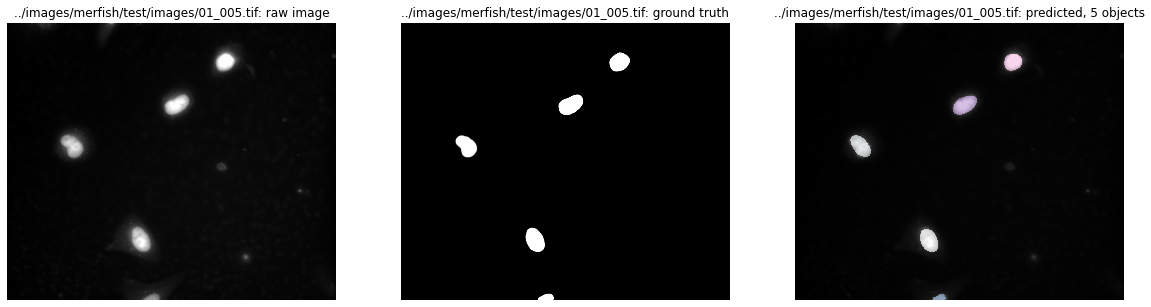

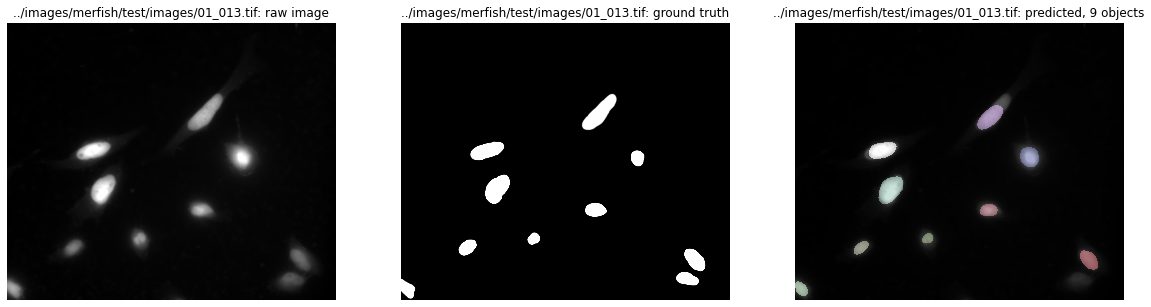

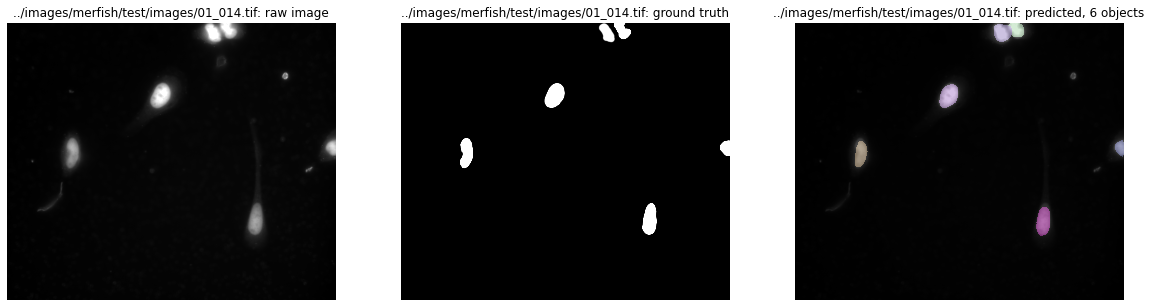

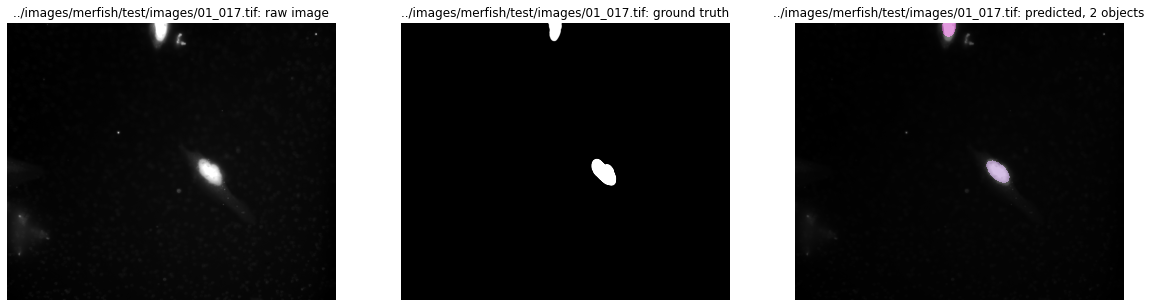

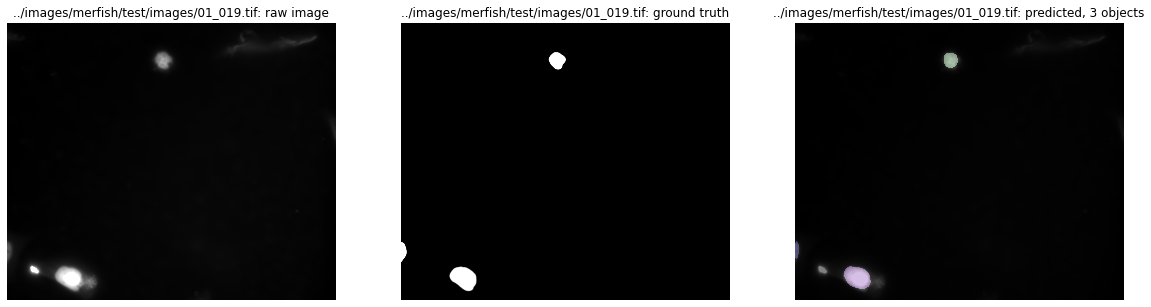

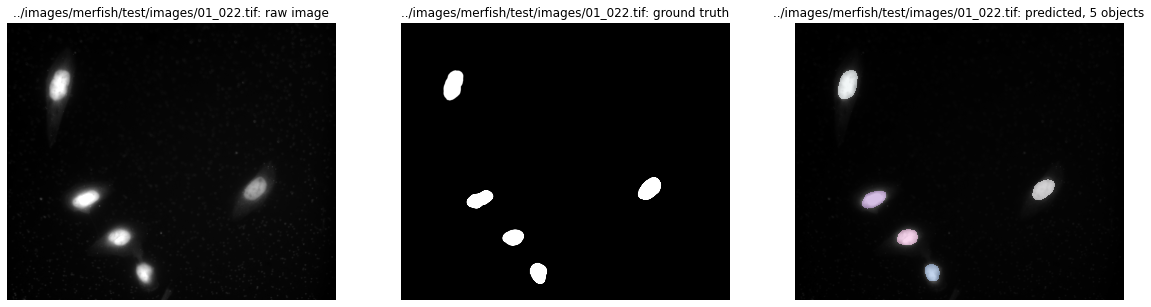

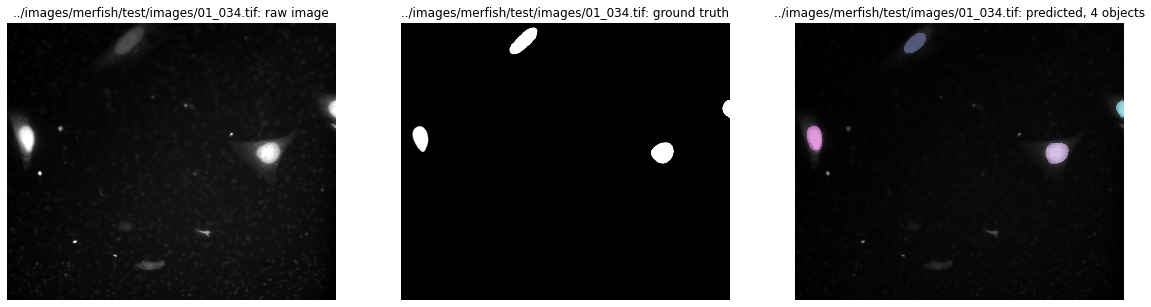

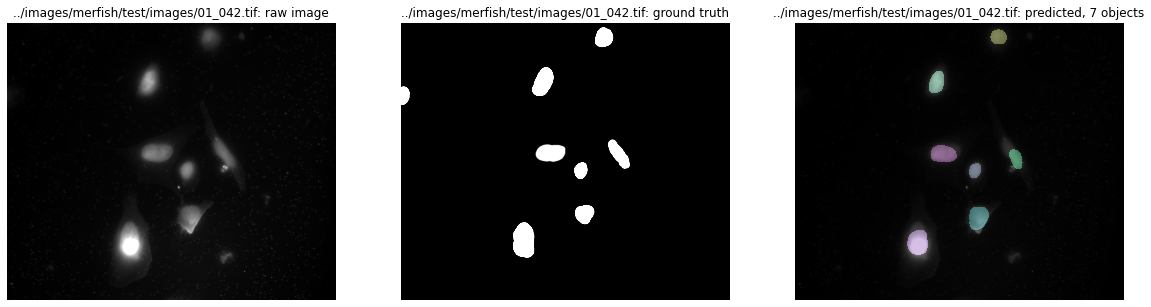

In [8]:
show_test_images(merfish_X_test, merfish_Y_test, merfish_Y_pred, merfish_X_test_names)

# Intensity Augmenter

In [4]:
# Load from disk
intensity_aug_merfish_model = StarDist2D(None, name='intensity_aug_merfish_model', basedir=model_dir) 

Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.543226, nms_thresh=0.3.


In [5]:
merfish_Y_pred = [intensity_aug_merfish_model.predict_instances(x, n_tiles=intensity_aug_merfish_model._guess_n_tiles(x), show_tile_progress=False)
              for x in tqdm(merfish_X_test)]

100%|██████████| 8/8 [02:12<00:00, 16.61s/it]


In [6]:
merfish_Y_pred_labels = [pred[0] for pred in merfish_Y_pred]
merfish_stats = [matching_dataset(merfish_Y_test, merfish_Y_pred_labels, thresh=t, show_progress=False) for t in tqdm(taus)]

100%|██████████| 9/9 [00:17<00:00,  1.99s/it]


In [7]:
merfish_stats

[DatasetMatching(criterion='iou', thresh=0.1, fp=0, tp=30, fn=13, precision=1.0, recall=0.6976744186046512, accuracy=0.6976744186046512, f1=0.821917808219178, n_true=43, n_pred=30, mean_true_score=0.5521881520945124, mean_matched_score=0.7914696846688012, panoptic_quality=0.6505230284949051, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.2, fp=0, tp=30, fn=13, precision=1.0, recall=0.6976744186046512, accuracy=0.6976744186046512, f1=0.821917808219178, n_true=43, n_pred=30, mean_true_score=0.5521881520945124, mean_matched_score=0.7914696846688012, panoptic_quality=0.6505230284949051, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.3, fp=0, tp=30, fn=13, precision=1.0, recall=0.6976744186046512, accuracy=0.6976744186046512, f1=0.821917808219178, n_true=43, n_pred=30, mean_true_score=0.5521881520945124, mean_matched_score=0.7914696846688012, panoptic_quality=0.6505230284949051, by_image=False),
 DatasetMatching(criterion='iou', thresh=0.4, fp=1, tp=29, fn=14, prec

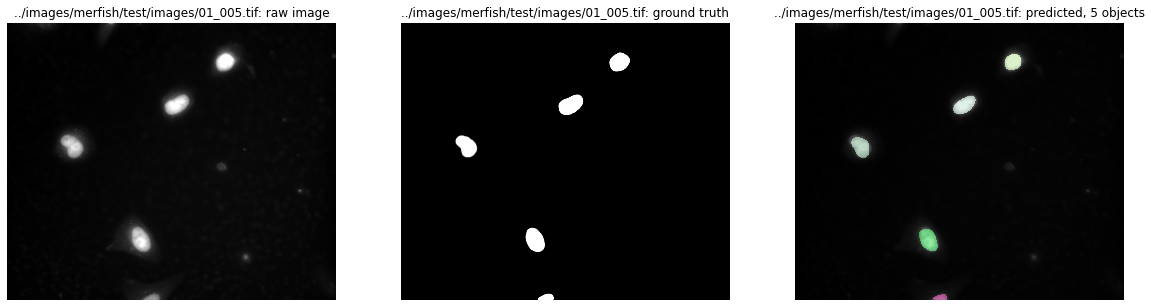

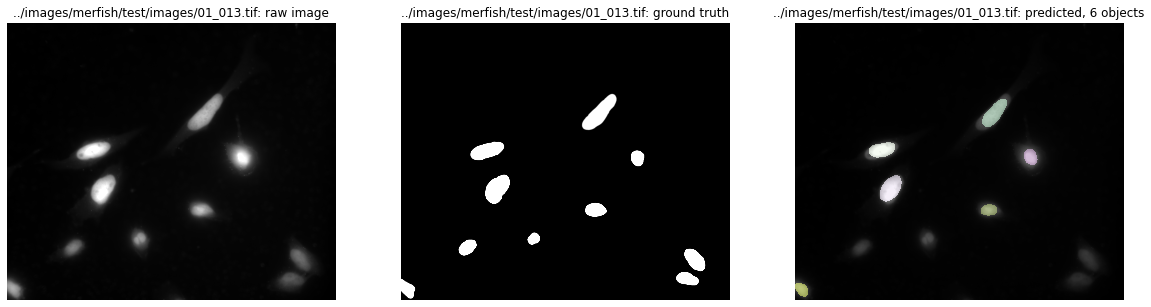

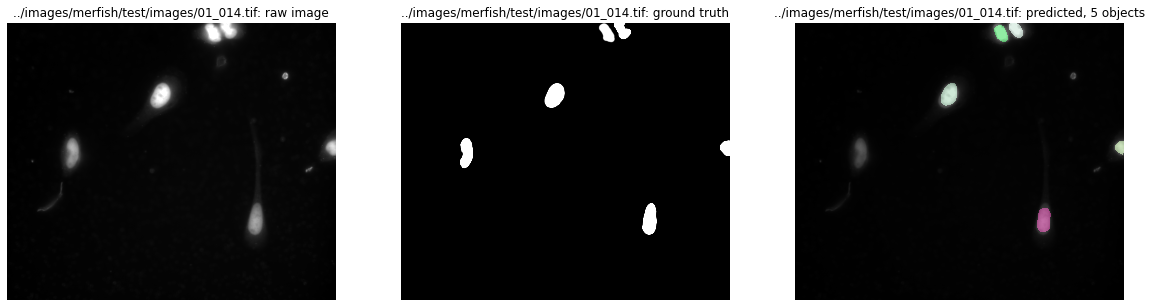

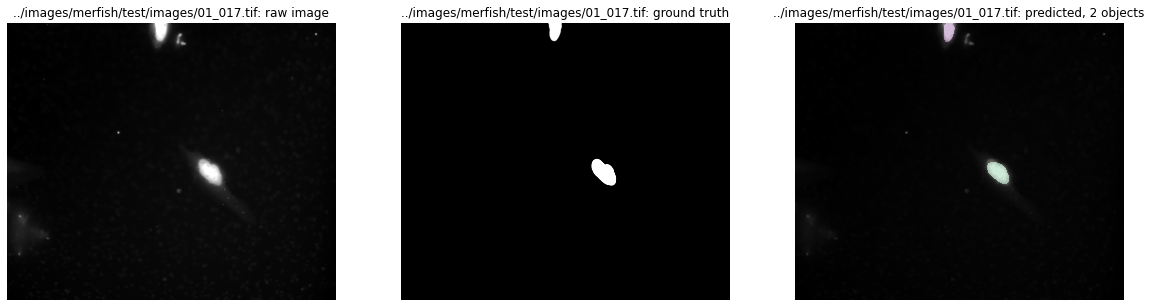

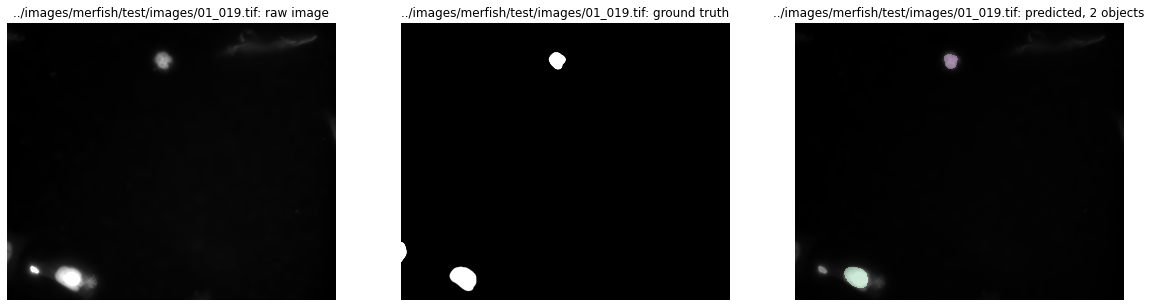

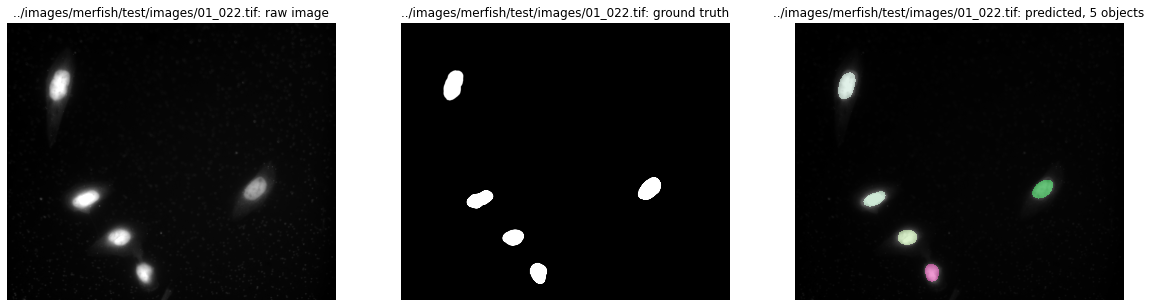

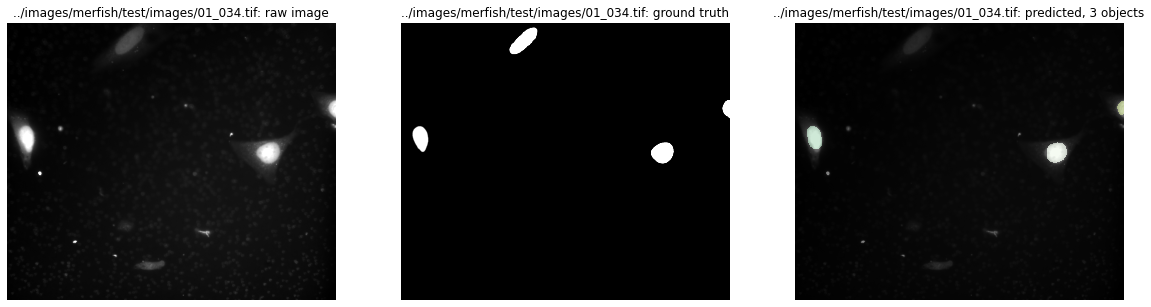

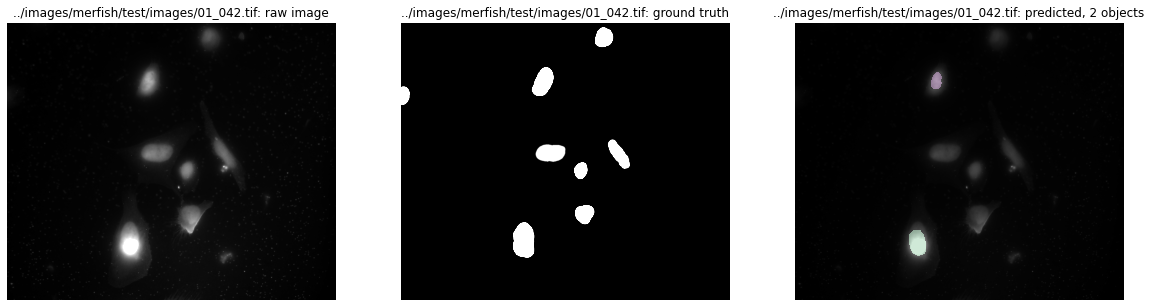

In [8]:
show_test_images(merfish_X_test, merfish_Y_test, merfish_Y_pred, merfish_X_test_names)